## Try 10.7.1: Principal components with the travel ratings dataset.

**The Python code below imports the travel ratings dataset, calculates a correlation matrix, and applies principal components analysis.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [1]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
reviews = pd.read_csv('tripadvisor_review.csv').dropna()

In [7]:
# Drop user ratings
X = reviews.drop(axis=1, labels='User ID')
X

,Art,Clubs,Juice bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Religious
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [9]:
# Standardize input features to mean=0 and sd=1
scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(X),
    columns=[
        'Art',
        'Clubs',
        'Juice bars',
        'Restaurants',
        'Museums',
        'Resorts',
        'Parks',
        'Beaches',
        'Theaters',
        'Religious',
    ],
)
X.describe().round(2)

,Art,Clubs,Juice bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Religious
count,980.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.69,-2.83,-1.12,-1.37,-2.01,-3.16,-2.68,-3.02,-2.28,-2.05
25%,-0.68,-0.57,-0.94,-0.44,-0.69,-0.71,-0.12,-0.69,-0.71,-0.81
50%,-0.19,-0.15,-0.25,-0.12,-0.09,-0.08,-0.12,-0.11,-0.08,-0.06
75%,0.39,0.43,0.71,0.17,0.60,0.66,-0.12,0.55,0.52,0.75
max,7.12,4.78,3.31,10.40,5.40,3.56,3.72,4.04,4.39,2.68


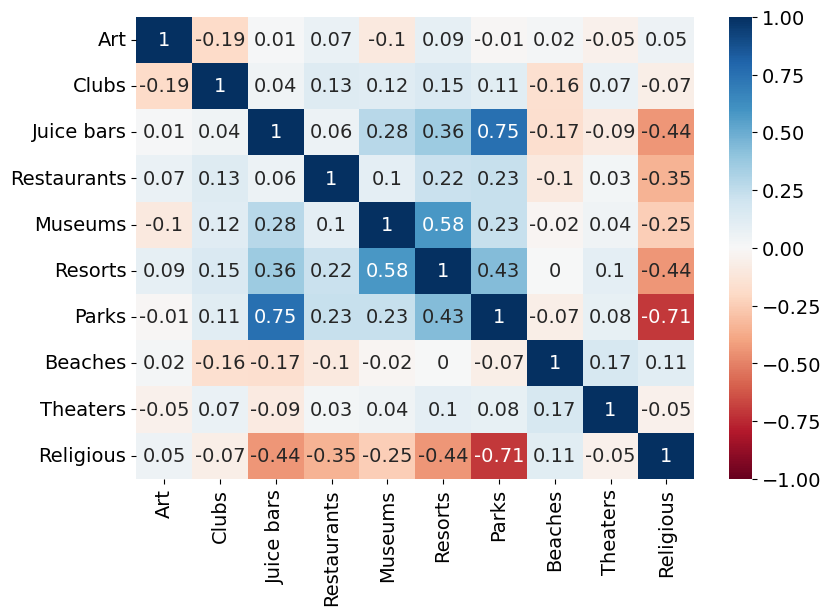

In [11]:
# Plot correlation matrix for input features
plt.figure(figsize=(9, 6))
plt.rcParams.update({'font.size': 14})
sns.heatmap(X.corr().round(2), cmap="RdBu", annot=True, vmin=-1, vmax=1)
plt.show()

## Try 10.7.2: Clustering with the travel ratings dataset.

**The Python code below imports the travel ratings dataset and applies k-means clustering to the dataset.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [35]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [39]:
reviews = pd.read_csv('tripadvisor_review.csv').dropna()

In [41]:
# seed for reproducibility
seed = 123

In [43]:
# Drop user ID from dataset
X = reviews.drop(axis=1, labels=['User ID'])
X

,Art,Clubs,Juice bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Religious
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [45]:
# Initialize a k-means model with k=4
kmModel = KMeans(n_clusters=4, random_state=seed, n_init=10)
kmModel = kmModel.fit(X)
clusters = kmModel.fit_predict(X)
centroids = kmModel.cluster_centers_

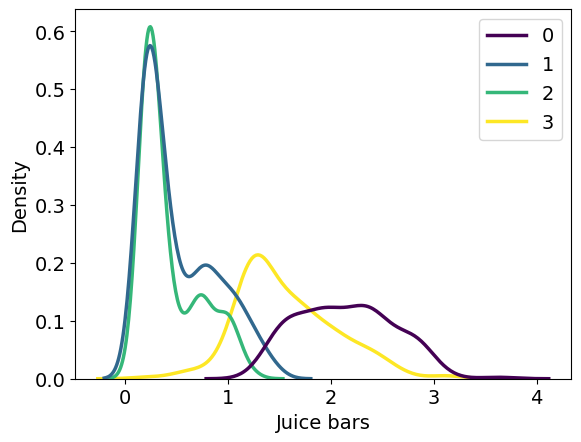

In [47]:
# Show cluster ratings for juice bars
p = sns.kdeplot(data=X, x='Juice bars', hue=clusters, palette='viridis', linewidth=2.5)
p.set_xlabel('Juice bars', fontsize=14)
p.set_ylabel('Density', fontsize=14)
plt.show()

In [49]:
# Describe cluster ratings for juice bars
X[['Juice bars']].groupby(by=clusters).describe().round(2)

Juice bars                                          
       count  mean   std   min   25%   50%   75%   max
0      178.0  2.14  0.46  1.28  1.78  2.13  2.48  3.62
1      335.0  0.52  0.35  0.13  0.22  0.35  0.78  1.47
2      257.0  0.43  0.29  0.13  0.22  0.29  0.64  1.25
3      210.0  1.57  0.47  0.22  1.23  1.46  1.89  3.12

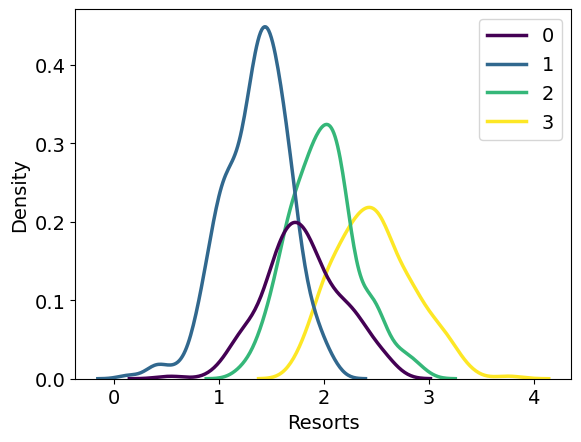

In [51]:
# Show cluster ratings for resorts
p = sns.kdeplot(data=X, x='Resorts', hue=clusters, palette='viridis', linewidth=2.5)
p.set_xlabel('Resorts', fontsize=14)
p.set_ylabel('Density', fontsize=14)
plt.show()

In [53]:
# Describe cluster ratings for juice bars
X[['Resorts']].groupby(by=clusters).describe().round(2)

Resorts                                          
    count  mean   std   min   25%   50%   75%   max
0   178.0  1.80  0.37  0.54  1.58  1.78  2.06  2.62
1   335.0  1.35  0.32  0.14  1.14  1.38  1.58  2.10
2   257.0  1.99  0.33  1.20  1.76  1.98  2.18  2.93
3   210.0  2.48  0.37  1.76  2.22  2.46  2.74  3.76

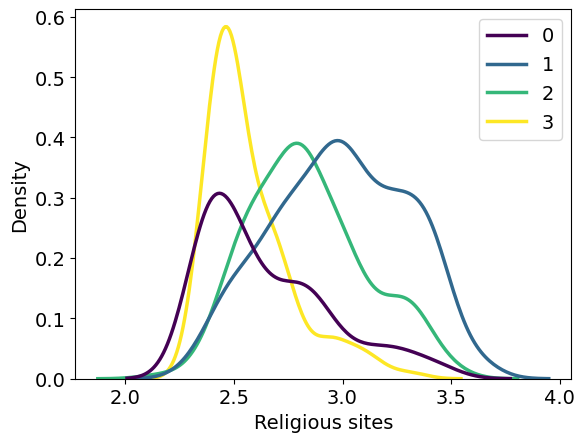

In [55]:
# Show cluster ratings for religious sites
p = sns.kdeplot(data=X, x='Religious', hue=clusters, palette='viridis', linewidth=2.5)
p.set_xlabel('Religious sites', fontsize=14)
p.set_ylabel('Density', fontsize=14)
plt.show()

In [57]:
# Describe cluster ratings for religious sites
X[['Religious']].groupby(by=clusters).describe().round(2)

Religious                                          
      count  mean   std   min   25%   50%   75%   max
0     178.0  2.65  0.29  2.32  2.40  2.56  2.82  3.46
1     335.0  2.99  0.31  2.30  2.78  2.98  3.23  3.66
2     257.0  2.84  0.27  2.14  2.64  2.80  2.98  3.54
3     210.0  2.57  0.20  2.32  2.42  2.50  2.66  3.34

## Try 10.7.3: Outlier detection with the travel ratings dataset.

**The Python code below imports the travel ratings dataset and applies the DBSCAN algorithm for outlier detection.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [67]:
from sklearn.cluster import DBSCAN

In [69]:
reviews = pd.read_csv('tripadvisor_review.csv').dropna()

In [71]:
# Drop user ID
X = reviews.drop(axis=1, labels='User ID')
X

,Art,Clubs,Juice bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Religious
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [73]:
# Define DBSCAN model
dbscanModel = DBSCAN(eps=1, min_samples=20)

# Fit the model
dbscanModel = dbscanModel.fit(X)
clusters = dbscanModel.fit_predict(X)

In [75]:
# Subset of outliers
outliers = X[clusters == -1]
outliers.describe()

,Art,Clubs,Juice bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Religious
count,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.201628,1.918140,0.875814,1.14907,1.276744,2.073256,3.181395,2.802093,1.558372,2.747442
std,0.665375,0.950907,0.798237,0.92758,0.812192,0.644348,0.006755,0.151368,0.400939,0.344398
min,0.450000,0.040000,0.130000,0.15000,0.100000,0.140000,3.170000,2.580000,0.960000,2.140000
25%,0.735000,1.120000,0.250000,0.44000,0.680000,1.650000,3.180000,2.690000,1.265000,2.460000
50%,0.960000,1.880000,0.560000,0.57000,1.180000,2.100000,3.180000,2.780000,1.500000,2.700000
75%,1.485000,2.940000,1.375000,1.87000,1.580000,2.450000,3.180000,2.905000,1.660000,2.960000
max,3.220000,3.640000,3.620000,3.44000,3.300000,3.340000,3.200000,3.220000,2.590000,3.600000


In [77]:
# Subset of non-outliers
nonoutliers = X[clusters == 0]
nonoutliers.describe()

,Art,Clubs,Juice bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Religious
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,0.879039,1.326660,1.019616,0.504205,0.924269,1.832327,3.180918,2.836574,1.569947,2.801601
std,0.295541,0.428159,0.788017,0.158021,0.406298,0.532254,0.007873,0.136734,0.363103,0.320279
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.260000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.830000,0.490000,0.880000,1.780000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.520000,1.580000,0.570000,1.200000,2.180000,3.180000,2.910000,1.760000,3.040000
max,2.080000,2.960000,3.120000,1.790000,2.580000,3.760000,3.210000,3.390000,3.170000,3.660000


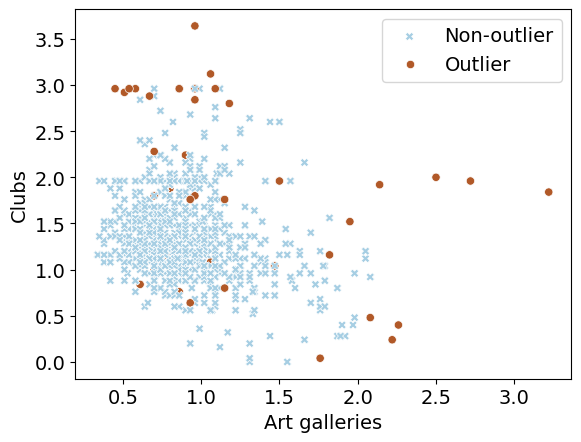

In [79]:
# Plot art gallery and club ratings
p = sns.scatterplot(
    data=X, x='Art', y='Clubs', hue=clusters, style=clusters, palette='Paired_r'
)
p.set_xlabel('Art galleries', fontsize=14)
p.set_ylabel('Clubs', fontsize=14)
plt.legend(labels=['Non-outlier', 'Outlier'])
plt.show()

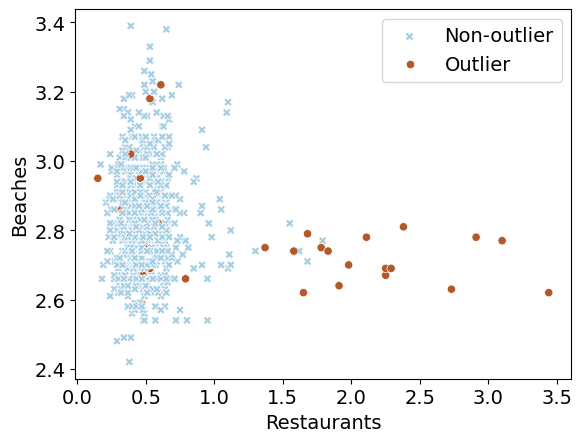

In [83]:
# Plot restaurant and beach ratings
p = sns.scatterplot(
    data=X,
    x='Restaurants',
    y='Beaches',
    hue=clusters,
    style=clusters,
    palette='Paired_r',
)
p.set_xlabel('Restaurants', fontsize=14)
p.set_ylabel('Beaches', fontsize=14)
plt.legend(labels=['Non-outlier', 'Outlier'])
plt.show()